In [1]:
%matplotlib inline

In [543]:
from skimage import data, io, segmentation, color, draw
from skimage.measure import regionprops
from skimage.future import graph
import matplotlib.pyplot as plt
import matplotlib as mpl
#import pandas as pd
import numpy as np
import cv2

In [591]:
def RAG_Thresholding(img,threshold = 20,n_segments=400):
    
    # SLIC - K-Means based image segmentation
    labels1 = segmentation.slic(img, n_segments)
    out1 = color.label2rgb(labels1, img, kind='avg')

    g = graph.rag_mean_color(img, labels1)
    
    # Combine regions separated by weight less than threshold.
    labels2 = graph.cut_threshold(labels1, g, threshold)
    out2 = color.label2rgb(labels2, img, kind='avg')
    boundaries = segmentation.mark_boundaries(out2, labels2, (0, 0, 0))

    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,
                           figsize=(18, 8))
    
    
    return out1,out2,boundaries,threshold
    
    

def show(titles,images):
    plt.style.use('ggplot')
    # print(plt.style.available)
    plt.rcParams["figure.figsize"] = (18,8)
    for j in range(4):
         plt.subplot(2, 2, j+1), plt.imshow(images[j], 'gray')
         plt.title(titles[j])
         plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    # plt.show()

In [592]:
#img = data.coffee()
#img = data.camera()
#img = data.cell()
#img = data.checkerboard()
img = data.chelsea()
#img = data.clock()
#img = data.colorwheel()
#img = io.imread("amir.ppm")
#img = io.imread("lena.ppm")
#img = io.imread("peppers.ppm")
#img = io.imread("baboon.ppm")
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



#img = io.imread("02.pgm")
#img = io.imread("07.pgm")
#img = io.imread("08.pgm")



# RAG Split and Merge

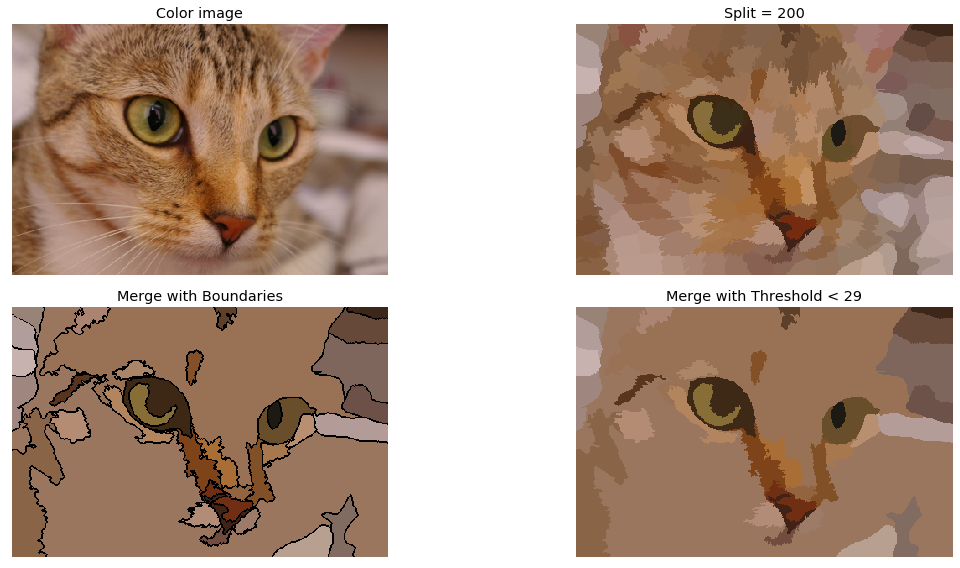

In [593]:
thresh = 29
n_segments = 200

split, threshold, boundaries, thres = RAG_Thresholding(img,thres,n_segments)

_, thBinary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
mergeThreshTitle = 'Merge with Threshold < ' + str(thresh)
spl = 'Split = ' + str(n_segments)
titles = ['Color image', spl, 'Merge with Boundaries', mergeThreshTitle]
images = [img, split, boundaries, threshold]

show(titles,images)

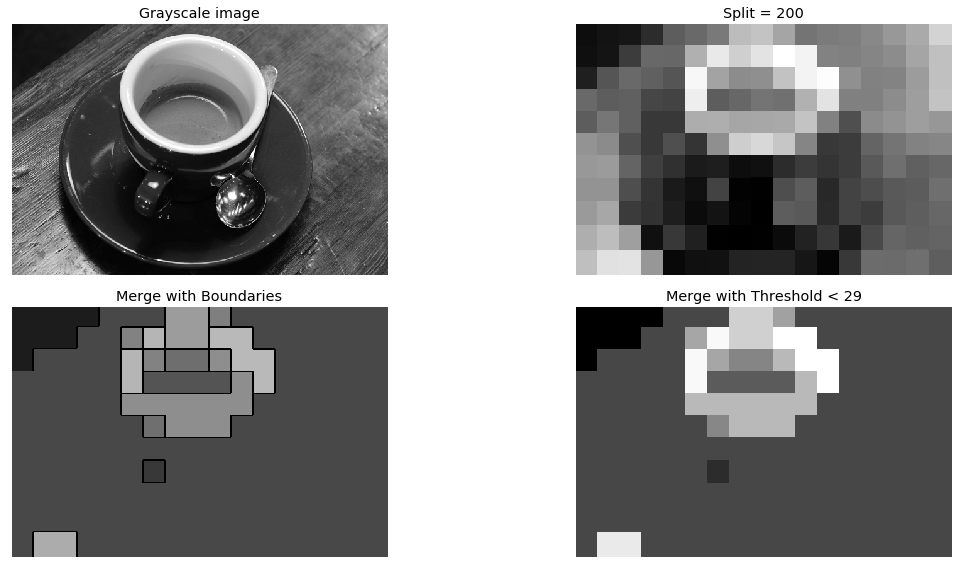

In [594]:
img = gray
split, threshold, boundaries, thres = RAG_Thresholding(img,thres,n_segments)

_, thBinary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
mergeThreshTitle = 'Merge with Threshold < ' + str(thresh)
spl = 'Split = ' + str(n_segments)
titles = ['Grayscale image', spl, 'Merge with Boundaries', mergeThreshTitle]
images = [img, split, boundaries, threshold]

show(titles,images)

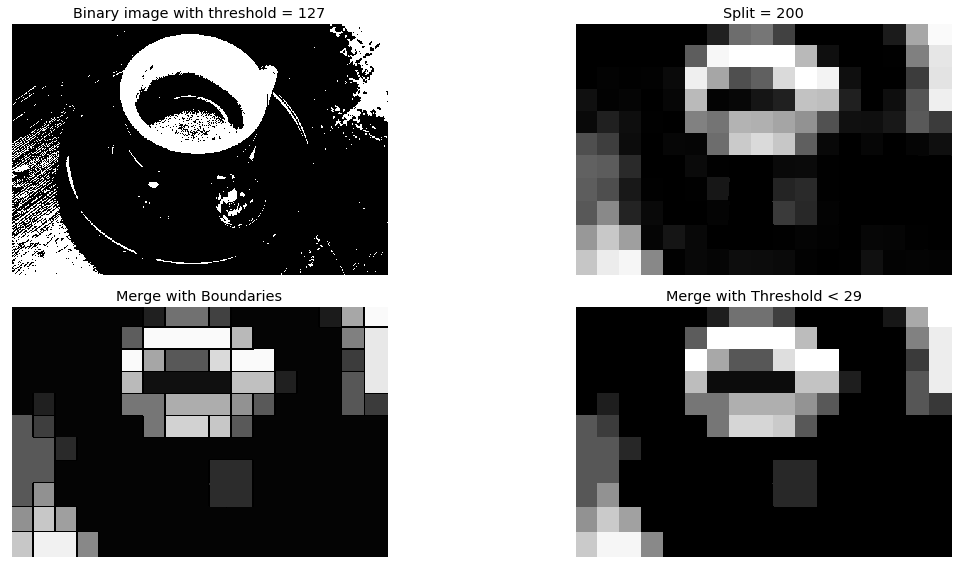

In [597]:
img = thBinary

split, threshold, boundaries, thres = RAG_Thresholding(img,thres,n_segments)

thr = 127
_, thBinary = cv2.threshold(gray, thr, 255, cv2.THRESH_BINARY)
mergeThreshTitle = 'Merge with Threshold < ' + str(thresh)
spl = 'Split = ' + str(n_segments)
binaryImageTitle = 'Binary image with threshold = ' + str(thr)
titles = [binaryImageTitle, spl, 'Merge with Boundaries', mergeThreshTitle]
images = [img, split, boundaries, threshold]

show(titles,images)

# Histogram

(400, 600)


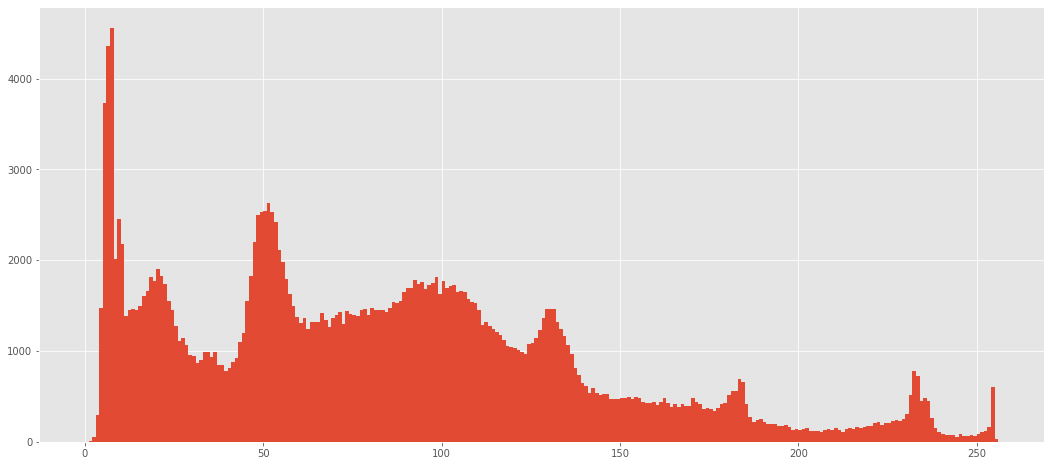

In [582]:
print(gray.shape)
plt.hist(gray.ravel(), 256,[0,256])
plt.show()